# CA1 Assignment

## Instructions
For your CA1 assignment, you are to fill in the missing code cell blocks and produce an output that is indicated below the cell block. Follow the task instructions as directed in each section and write your code under the TODO comment to achieve the result underneath the cell block.

### Data Visualization
From section 3 onwards, you will be asked to write code to reproduce the data visualization under the cell block. You will need to reproduce the data visualization as closely to the output as possible (i.e., you will need to replicate the color, graph markings, etc., etc). Marks will not be awarded if you deviate from the data visualization output

## Section 1: Loading the Datasets

You are given two CSV files:
1. **hdb_residential_unit_data.csv** - yearly number of HDB units sold and rented
2. **hdb_quaterly_resale_price_index.csv** - quaterly HDB resale price index

### Task Instructions:
1. Use **Python's `genfromtxt` function** to load both files
2. Skip header rows
3. Store the contents as NumPy arrays for further analysis

In [3]:
# TODO: Import all required libraries
# Allowed libraries: numpy, matplotlib, os, math

import numpy as np
import matplotlib.pyplot as plt
import os

In [1]:
# ============================================================
# SECTION 1: LOADING THE DATASETS
# ============================================================

# TODO: Load both datasets using the csv module and convert the datasets to NumPy arrays
import numpy as np               
import matplotlib.pyplot as plt  
import os                        

# ============================================================
# SECTION 1: LOADING THE DATASETS
# ============================================================
unit_data_path = os.path.join("dataset", "hdb_residential_unit_data.csv")
price_index_path = os.path.join("dataset", "hdb_quaterly_resale_price_index.csv")


# ------------------------------------------------------------
# Load Dataset 1: HDB Residential Unit Data (Yearly sold/rented)
# ------------------------------------------------------------
# - skip_header=1 skips the first row (column names)


unit_data = np.genfromtxt(
    unit_data_path,          
    delimiter=",",           
    dtype="U50",             
    skip_header=1,           # skip the header row
    encoding=None            
)

# ------------------------------------------------------------
# Load Dataset 2: Quarterly HDB Resale Price Index
# ------------------------------------------------------------

price_index_data = np.genfromtxt(
    price_index_path,        
    delimiter=",",           
    dtype="U50",             
    skip_header=1,           # skip header row
    encoding=None            
)

# Print shapes to confirm successful loading
print("Residential unit data loaded. Shape:", unit_data.shape) #(rows, columns)
print("Resale price index data loaded. Shape:", price_index_data.shape)

Residential unit data loaded. Shape: (334, 5)
Resale price index data loaded. Shape: (143, 2)


## Section 2: Exploring the HDB Unit Data

Let's start by exploring the **residential unit data**.

### Task Instructions:
1. Display the unique `category` values (Sold/Rented).
2. Convert the `no_of_units` column to integers
3. Compute the total number of units sold per financial year.
4. Compute the total number of units rented per financial year

In [3]:
# ============================================================
# SECTION 2: EXPLORING THE HDB UNIT DATA
# ============================================================


# Columns:
# 0 - financial_year
# 1 - property_type
# 2 - category (Sold / Rented)
# 3 - flat_type
# 4 - no_of_units


# Extract years and category columns 
years = unit_data[:, 0].astype(int)       
category_col = unit_data[:, 2]            

unique_years = np.unique(years)

category_col = np.char.strip(category_col)        # remove extra spaces
category_col = np.char.capitalize(category_col)   # make consistent
unique_categories = np.unique(category_col)
print("Categories:", unique_categories)
print("Years: ", unique_years)




# Units
units_raw = unit_data[:, 4]
clean_units = []
for v in units_raw:
    try:
        clean_units.append(int(v))
    except:
        clean_units.append(0)
units_col = np.array(clean_units)


# ------------------------------------------------------------
# PART 3: Compute total sold and rented units per year
# ------------------------------------------------------------

sold_list = []
rented_list = []

for y in unique_years:
    # check for rows matching the year
    # mask_year will be a boolean array
    # years == y compares each element in years to y
    mask_year = (years == y)

    sold_total = units_col[(mask_year) & (category_col == "Sold")].sum()
    rented_total = units_col[(mask_year) & (category_col == "Rented")].sum()

    sold_list.append(int(sold_total))
    rented_list.append(int(rented_total))

print("Sold units per year: ", sold_list)
print("Rented units per year: ", rented_list)



Categories: ['Rented' 'Sold']
Years:  [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021]
Sold units per year:  [5712, 11991, 4738, 4990, 8125, 14057, 12177, 15204, 27679, 21621, 23161, 28739, 17721, 13282, 9201, 14952]
Rented units per year:  [4037, 2735, 2450, 2980, 3414, 4095, 4451, 3738, 3093, 3319, 3799, 3412, 3320, 3283, 4943, 3290]


## Section 3: Visualizing HDB Units Sold and Rented

Let's visualize the trend of sold and rented units over time

### Task Intructions:
1. Plot a **line chart** showing both sold and rented units across years.
2. Add labels, title, legend and gridlines

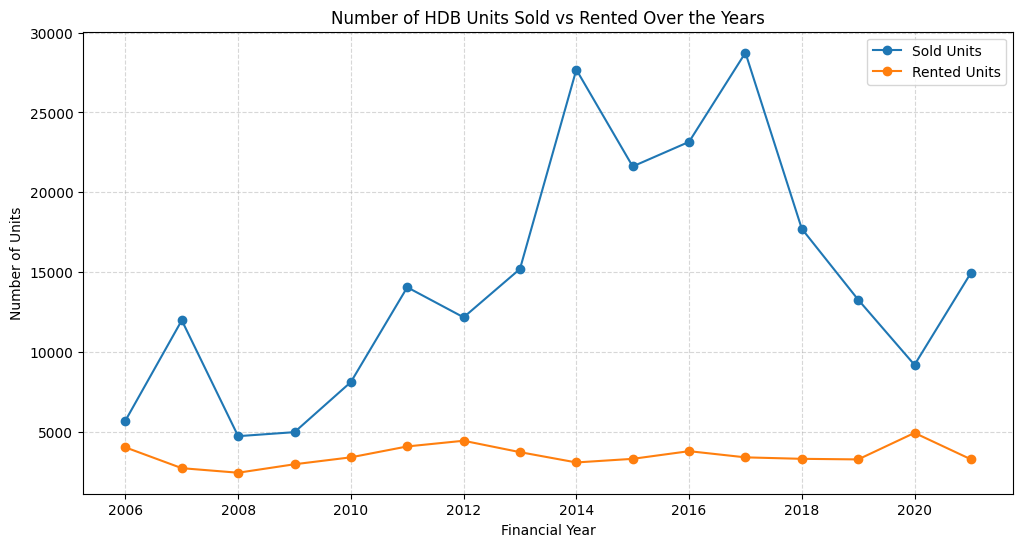

In [4]:

# ============================================================
# SECTION 3: VISUALIZING HDB UNITS SOLD VS RENTED
# ============================================================

import matplotlib.pyplot as plt

# unique_years     → Array of years 
# sold_list        → Total sold units for each year
# rented_list      → Total rented units for each year


# Create a new figure with a larger size for readability
plt.figure(figsize=(12, 6))



# ------------------------------------------------------------
# Plot Sold Units
# ------------------------------------------------------------
#   o  → circular markers on each data point
#   -  → line connecting the points
# matlib auto select color if u want to specify color eg red use "o-r" 
plt.plot(unique_years, sold_list, "o-", label="Sold Units")



# ------------------------------------------------------------
# Plot Rented Units
# ------------------------------------------------------------

plt.plot(unique_years, rented_list, "o-", label="Rented Units")



# ------------------------------------------------------------
# Add Labels and Title
# ------------------------------------------------------------
plt.xlabel("Financial Year")         # Label for the X-axis
plt.ylabel("Number of Units")        # Label for the Y-axis
plt.title("Number of HDB Units Sold vs Rented Over the Years")   # Chart title



# ------------------------------------------------------------
# Add Legend
# ------------------------------------------------------------
# This shows which line represents sold or rented units
plt.legend()



# ------------------------------------------------------------
# Add Gridlines for easier reading
# ------------------------------------------------------------
plt.grid(True, linestyle="--", alpha=0.5)



# ------------------------------------------------------------
# Display the final chart
# ------------------------------------------------------------
plt.show()



## Section 4: Exploring the HDB Price Index

The resale price index tracks overall market trends.

### Task Instructions:
1. Extract the `quater` and `index` columns.
2. convert the `index` values to floats.
3. Group quaterly data by year (first 3 digits of `quater`) and compute the **average index per year**
4. Visualize the yearly average resale price index

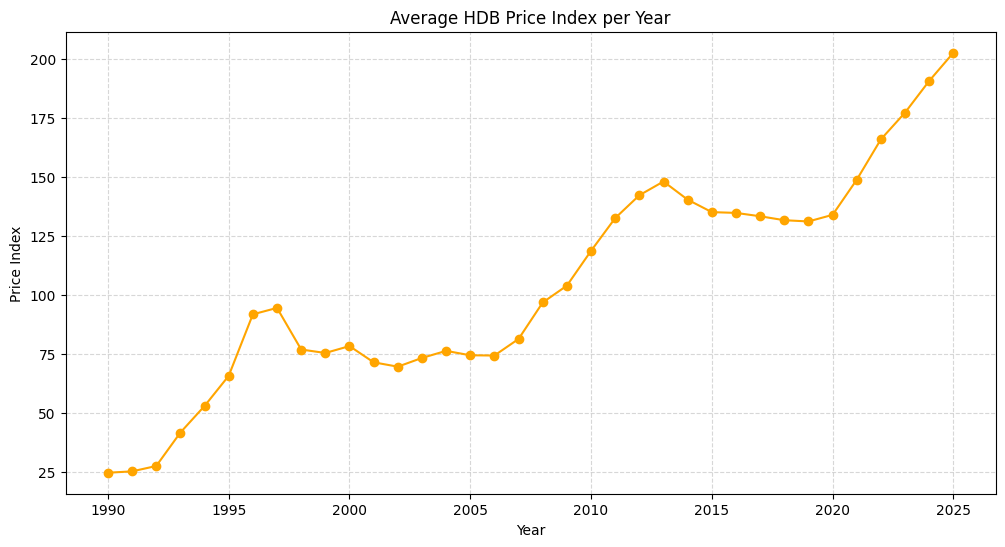

In [5]:
# ============================================================
# SECTION 4: EXPLORING THE HDB PRICE INDEX
# ============================================================


# Column 0 → quarter 
# Column 1 → index   (string, needs conversion to float)

# ------------------------------------------------------------
# 1. Extract 'quarter' and 'index' columns
# ------------------------------------------------------------
quarters = price_index_data[:, 0]     
index_raw = price_index_data[:, 1]    

# ------------------------------------------------------------
# 2. Convert the index column using astyle from string to float values
# ------------------------------------------------------------
price_index = index_raw.astype(float)


# ------------------------------------------------------------
# 3. Group quarterly data by year and compute average
# ------------------------------------------------------------

# Extract the first 4 characters of each quarter value ( "1990-Q1" → "1990")
years = np.array([q[:4] for q in quarters]).astype(int)


# Find all unique years in ascending order
unique_years = np.unique(years)

avg_index_per_year = []

for y in unique_years:
    mask_year = (years == y)                   # Boolean array groups the quarters by year
    yearly_avg = price_index[mask_year].mean() # Compute average index
    avg_index_per_year.append(yearly_avg)


# ------------------------------------------------------------
# 4. Visualize the yearly average resale price index
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(unique_years, avg_index_per_year, "o-", color="orange")

plt.xlabel("Year")
plt.ylabel("Price Index")
plt.title("Average HDB Price Index per Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Section 5: Comparing Unit Trends with Price Index

Now let's compare the **number of HDB units sold** with the **HDB price index** over the years

### Task Instructions:
1. Align both datasets by year (ignore years notoverlapping)
2. Plot a **dual-axis line chart**
    - Left y-axis: number of units sold
    - Right y-axis: resale price index
3. Observe whther sales volume rises or falls with prices

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# ============================================================
# SECTION 5: COMPARING UNIT TRENDS WITH PRICE INDEX
# ============================================================

# --- Build sold & rented dictionaries (clean int keys) ---
sold_per_year = {int(y): int(units_col[(years == y) & (category_col == "Sold")].sum()) 
                 for y in unique_years}

rented_per_year = {int(y): int(units_col[(years == y) & (category_col == "Rented")].sum()) 
                   for y in unique_years}

# Convert RPI data to yearly averages
quarters = price_index_data[:, 0]
rpi_raw = price_index_data[:, 1].astype(float)
rpi_years = np.array([int(q.split("-")[0]) for q in quarters])

unique_rpi_years = np.unique(rpi_years)
yearly_rpi = {int(y): float(np.mean(rpi_raw[rpi_years == y])) for y in unique_rpi_years}

# --- Find overlapping years (should be 2006–2021) ---
common_years = np.intersect1d(list(sold_per_year.keys()), list(yearly_rpi.keys()))

# --- Align values ---
aligned_sold = np.array([sold_per_year[y] for y in common_years])
aligned_rpi  = np.array([yearly_rpi[y]  for y in common_years])

print("Common years:", common_years)
print("Sold:", aligned_sold)
print("RPI:", aligned_rpi)

# --- Dual-Axis Plot ---
plt.figure(figsize=(12, 6))
plt.title("Comparison: HDB Units Sold vs Resale Price Index")

plt.plot(common_years, aligned_sold, marker="o", color="steelblue", label="Units Sold")
plt.xlabel("Year")
plt.ylabel("Units Sold", color="steelblue")
plt.tick_params(axis="y", labelcolor="steelblue")

ax2 = plt.twinx()
ax2.plot(common_years, aligned_rpi, marker="x", color="firebrick", label="Resale Price Index")
ax2.set_ylabel("Resale Price Index", color="firebrick")
ax2.tick_params(axis="y", labelcolor="firebrick")

plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


ValueError: operands could not be broadcast together with shapes (143,) (334,) 

## Section 6: Reflection

In your reflection report, answer the following:

1. Discuss **two key insights** you observed about HDB housing trends.
2. What relationship, if any, did you find between the **number of units sold** and the **price index**?
3. What challenges did you face using Numpy and Matplotlib?

Save your responses in the **Reflection Report** and submit it along with this notebook